In [108]:
# імпорт бібліотек

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
# завантаження даних
df = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\GSready.csv')
df = df[['Date', 'GS']]
df

,Date,GS
0,2010-01-04,173.080002
1,2010-01-05,176.139999
2,2010-01-06,174.259995
3,2010-01-07,177.669998
4,2010-01-08,174.309998
...,...,...
4101,2021-03-28,326.283346
4102,2021-03-29,325.730011
4103,2021-03-30,332.010010
4104,2021-03-31,327.000000


In [3]:
# df.reset_index(inplace=True)

### Fourier Transformation

In [3]:
# функція перетворень Фур'є

def fourier_transform(df):
    fft_arr = np.fft.fft(np.array(df['GS'].tolist())) # швидке перетворення Фур'є
    fft_df = pd.DataFrame()
    fft_df['fft'] = fft_arr
    fft_df['amplitude'] = np.abs(fft_arr) # амплітуда
    fft_df['phase'] = np.angle(fft_arr) # фаза
    for n in [3, 6, 9, 20, 100]:
        fft_smth = fft_arr.copy()
        fft_smth[n : -n] = 0  #limit freq
        fft_df['inv_fft' + str(n)] = np.fft.ifft(fft_smth) # зворотнє перетворення
        fft_df['fft'+ str(n)+'amplitude'] = np.abs(fft_smth) # амплітуда
        fft_df['fft'+ str(n)+'phase'] = np.angle(fft_smth) # фаза
        
    return fft_df
        

In [4]:
fft_df = fourier_transform(df)

In [5]:
fft_df

,fft,amplitude,phase,inv_fft3,fft3amplitude,fft3phase,inv_fft6,fft6amplitude,fft6phase,inv_fft9,fft9amplitude,fft9phase,inv_fft20,fft20amplitude,fft20phase,inv_fft100,fft100amplitude,fft100phase
0,745963.220333+0.000000j,745963.220333,2.021241e-17,196.329058+4.673577j,745963.220333,2.021241e-17,206.848904-4.278590j,745963.220333,2.021241e-17,227.129638-5.891866j,745963.220333,2.021241e-17,252.493514-2.833824j,745963.220333,2.021241e-17,248.891640-0.249206j,745963.220333,2.021241e-17
1,-4555.075637+96870.877910j,96977.913471,1.617784e+00,196.241785+4.630124j,96977.913471,1.617784e+00,206.683378-4.306244j,96977.913471,1.617784e+00,226.724462-5.914749j,96977.913471,1.617784e+00,251.131430-2.800231j,96977.913471,1.617784e+00,240.649170-0.248776j,96977.913471,1.617784e+00
2,15226.663665+24411.322983j,28770.887650,1.013093e+00,196.154250+4.586574j,28770.887650,1.013093e+00,206.517375-4.333535j,28770.887650,1.013093e+00,226.316058-5.936511j,28770.887650,1.013093e+00,249.756022-2.764014j,28770.887650,1.013093e+00,232.466705-0.242532j,28770.887650,1.013093e+00
3,38820.713719-19189.707458j,43304.649704,-4.590902e-01,196.066451+4.542927j,0.000000,0.000000e+00,206.350900-4.360461j,43304.649704,-4.590902e-01,225.904467-5.957146j,43304.649704,-4.590902e-01,248.367889-2.725209j,43304.649704,-4.590902e-01,224.401234-0.230619j,43304.649704,-4.590902e-01
4,11779.832960+20400.684611j,23557.427644,1.047143e+00,195.978388+4.499184j,0.000000,0.000000e+00,206.183958-4.387019j,23557.427644,1.047143e+00,225.489733-5.976651j,23557.427644,1.047143e+00,246.967633-2.683852j,23557.427644,1.047143e+00,216.508114-0.213317j,23557.427644,1.047143e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,-15816.925047+136.236068j,15817.511758,3.132980e+00,196.761465+4.889345j,0.000000,0.000000e+00,207.669195-4.134956j,15817.511758,3.132980e+00,229.105668-5.760781j,15817.511758,3.132980e+00,259.083580-2.961439j,15817.511758,3.132980e+00,288.987582-0.168474j,15817.511758,3.132980e+00
4102,11779.832960-20400.684611j,23557.427644,-1.047143e+00,196.675510+4.846394j,0.000000,0.000000e+00,207.506132-4.164389j,23557.427644,-1.047143e+00,228.717243-5.789204j,23557.427644,-1.047143e+00,257.796870-2.941380j,23557.427644,-1.047143e+00,281.305740-0.194606j,23557.427644,-1.047143e+00
4103,38820.713719+19189.707458j,43304.649704,4.590902e-01,196.589293+4.803341j,43304.649704,4.590902e-01,207.342567-4.193472j,43304.649704,4.590902e-01,228.325388-5.816530j,43304.649704,4.590902e-01,256.493938-2.918567j,43304.649704,4.590902e-01,273.400108-0.216189j,43304.649704,4.590902e-01
4104,15226.663665-24411.322983j,28770.887650,-1.013093e+00,196.502811+4.760186j,28770.887650,-1.013093e+00,207.178503-4.222201j,28770.887650,-1.013093e+00,227.930142-5.842751j,28770.887650,-1.013093e+00,255.175352-2.893020j,28770.887650,-1.013093e+00,265.324876-0.232720j,28770.887650,-1.013093e+00


In [6]:
# зведення в один датасет
final_fft_df = pd.concat([df, fft_df], axis=1)
final_fft_df.set_index('Date', inplace=True)
final_fft_df

,GS,fft,amplitude,phase,inv_fft3,fft3amplitude,fft3phase,inv_fft6,fft6amplitude,fft6phase,inv_fft9,fft9amplitude,fft9phase,inv_fft20,fft20amplitude,fft20phase,inv_fft100,fft100amplitude,fft100phase
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,173.080002,745963.220333+0.000000j,745963.220333,2.021241e-17,196.329058+4.673577j,745963.220333,2.021241e-17,206.848904-4.278590j,745963.220333,2.021241e-17,227.129638-5.891866j,745963.220333,2.021241e-17,252.493514-2.833824j,745963.220333,2.021241e-17,248.891640-0.249206j,745963.220333,2.021241e-17
2010-01-05,176.139999,-4555.075637+96870.877910j,96977.913471,1.617784e+00,196.241785+4.630124j,96977.913471,1.617784e+00,206.683378-4.306244j,96977.913471,1.617784e+00,226.724462-5.914749j,96977.913471,1.617784e+00,251.131430-2.800231j,96977.913471,1.617784e+00,240.649170-0.248776j,96977.913471,1.617784e+00
2010-01-06,174.259995,15226.663665+24411.322983j,28770.887650,1.013093e+00,196.154250+4.586574j,28770.887650,1.013093e+00,206.517375-4.333535j,28770.887650,1.013093e+00,226.316058-5.936511j,28770.887650,1.013093e+00,249.756022-2.764014j,28770.887650,1.013093e+00,232.466705-0.242532j,28770.887650,1.013093e+00
2010-01-07,177.669998,38820.713719-19189.707458j,43304.649704,-4.590902e-01,196.066451+4.542927j,0.000000,0.000000e+00,206.350900-4.360461j,43304.649704,-4.590902e-01,225.904467-5.957146j,43304.649704,-4.590902e-01,248.367889-2.725209j,43304.649704,-4.590902e-01,224.401234-0.230619j,43304.649704,-4.590902e-01
2010-01-08,174.309998,11779.832960+20400.684611j,23557.427644,1.047143e+00,195.978388+4.499184j,0.000000,0.000000e+00,206.183958-4.387019j,23557.427644,1.047143e+00,225.489733-5.976651j,23557.427644,1.047143e+00,246.967633-2.683852j,23557.427644,1.047143e+00,216.508114-0.213317j,23557.427644,1.047143e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,326.283346,-15816.925047+136.236068j,15817.511758,3.132980e+00,196.761465+4.889345j,0.000000,0.000000e+00,207.669195-4.134956j,15817.511758,3.132980e+00,229.105668-5.760781j,15817.511758,3.132980e+00,259.083580-2.961439j,15817.511758,3.132980e+00,288.987582-0.168474j,15817.511758,3.132980e+00
2021-03-29,325.730011,11779.832960-20400.684611j,23557.427644,-1.047143e+00,196.675510+4.846394j,0.000000,0.000000e+00,207.506132-4.164389j,23557.427644,-1.047143e+00,228.717243-5.789204j,23557.427644,-1.047143e+00,257.796870-2.941380j,23557.427644,-1.047143e+00,281.305740-0.194606j,23557.427644,-1.047143e+00
2021-03-30,332.010010,38820.713719+19189.707458j,43304.649704,4.590902e-01,196.589293+4.803341j,43304.649704,4.590902e-01,207.342567-4.193472j,43304.649704,4.590902e-01,228.325388-5.816530j,43304.649704,4.590902e-01,256.493938-2.918567j,43304.649704,4.590902e-01,273.400108-0.216189j,43304.649704,4.590902e-01


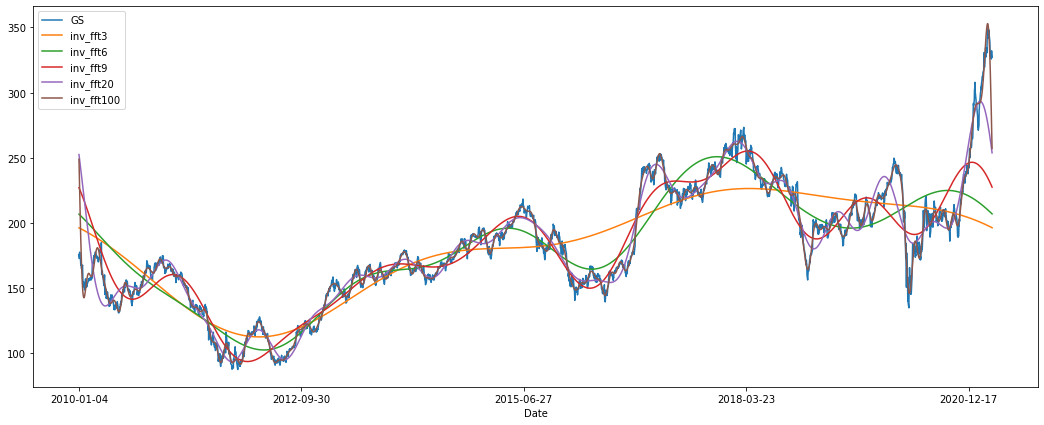

In [7]:
# візуалізація
final_fft_df[['GS']+['inv_fft3']+['inv_fft6']+['inv_fft9']+['inv_fft20']+['inv_fft100']].plot(figsize=(18,7));

In [8]:
# final_fft_df.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\fft_data.csv')

### ARIMA

In [11]:
# !pip install statsmodels

  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


In [13]:
# !pip install scikit-learn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [4]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [5]:
df_ = df.copy()

In [6]:
df_.set_index('Date', inplace=True)
df_

,GS
Date,
2010-01-04,173.080002
2010-01-05,176.139999
2010-01-06,174.259995
2010-01-07,177.669998
2010-01-08,174.309998
...,...
2021-03-28,326.283346
2021-03-29,325.730011
2021-03-30,332.010010


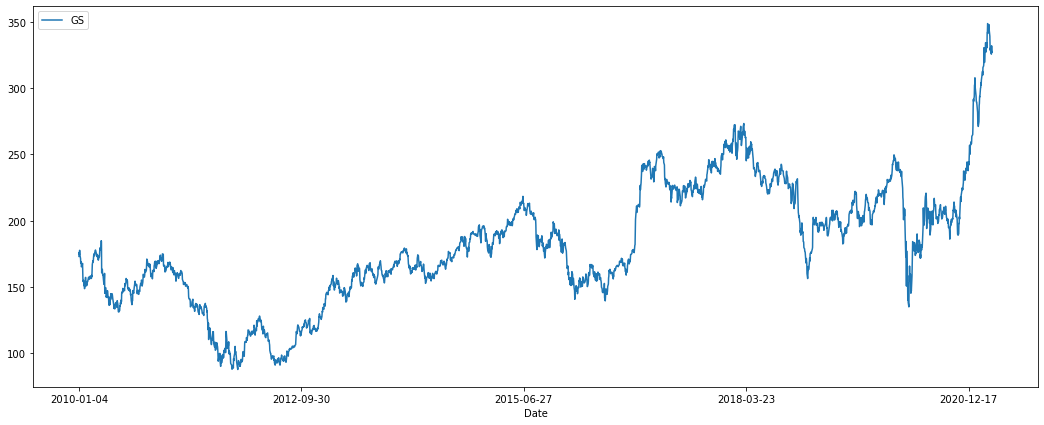

In [7]:
df_.plot(figsize=(18,7));

#### Examine data

In [8]:
df_.describe()

,GS
count,4106.000000
mean,181.676381
std,45.815498
min,87.699997
25%,153.605005
50%,176.728335
75%,213.165832
max,348.809998


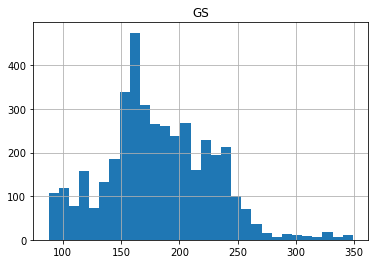

In [9]:
df_.hist(bins=30);

In [10]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(df_)
dict(zip(row, jb_test))

{'JB': array([92.55993674]),
 'p-value': array([7.95912113e-21]),
 'skew': array([0.33983581]),
 'kurtosis': array([3.28119212])}

In [11]:
from scipy.stats import shapiro
shapiro(df_)    #Shapiro-Wilk Test
    # p < 0.05 => reject null hyp and data is not normally distr

ShapiroResult(statistic=0.9837393760681152, pvalue=2.4340629629682464e-21)

In [12]:
adf = sm.tsa.stattools.adfuller(df_)    #Augmented Dickey-Fuller unit root test
print( 'adf: ', adf[0] )
print('p-value: ', adf[1])
print('Critical values: ', adf[4])
    #The null hypothesis for both tests is that the data are non-stationary. 
    #We want to REJECT the null hypothesis for this test, so we want a p-value of less that 0.05.
    
    #Series is non-stationary

adf:  -0.7644370244127162
p-value:  0.8293459245416761
Critical values:  {'1%': -3.431948291374147, '5%': -2.862246237563578, '10%': -2.567145937011734}


In [13]:
df_diff1 = df_.diff(periods=1).dropna()

In [14]:
adf = sm.tsa.stattools.adfuller(df_diff1)    #Augmented Dickey-Fuller unit root test
print( 'adf: ', adf[0] )
print('p-value: ', adf[1])
print('Critical values: ', adf[4])

    #Series is stationary

adf:  -17.704151302317598
p-value:  3.5259840463114336e-30
Critical values:  {'1%': -3.431948291374147, '5%': -2.862246237563578, '10%': -2.567145937011734}


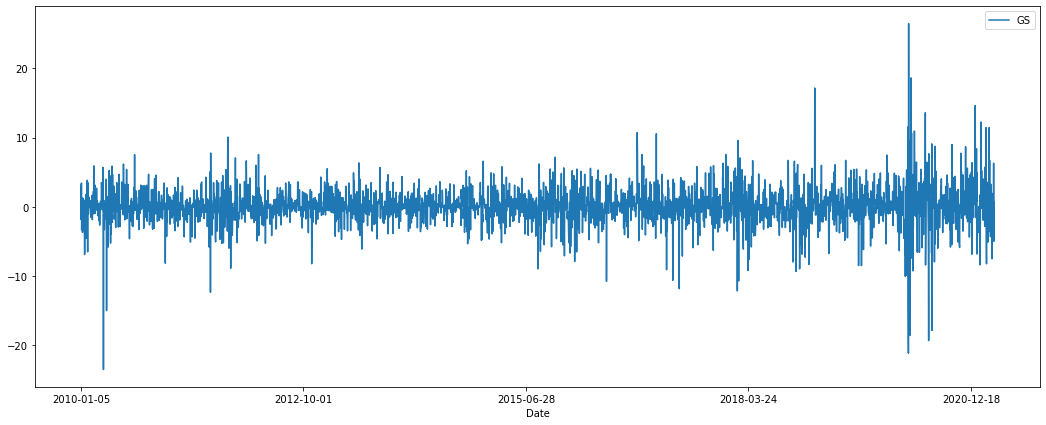

In [15]:
df_diff1.plot(figsize=(18,7));

In [16]:
df_diff1.describe()

,GS
count,4105.000000
mean,0.037652
std,2.463479
min,-23.570007
25%,-0.886663
50%,0.083333
75%,0.939988
max,26.490005


#### ARIMA Model

In [17]:
import matplotlib.pyplot as plt

##### 1 model

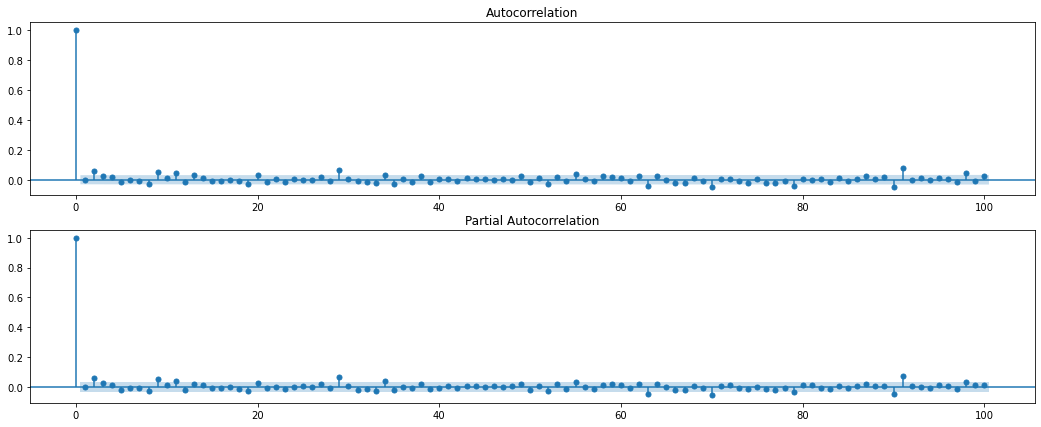

In [18]:
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff1, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff1, lags=100, ax=ax2)

In [25]:
df_diff1

,GS
Date,
2010-01-05,3.059997
2010-01-06,-1.880004
2010-01-07,3.410003
2010-01-08,-3.360000
2010-01-09,-0.916667
...,...
2021-03-28,-0.553335
2021-03-29,-0.553335
2021-03-30,6.279999


In [82]:
df_train, df_test = df_diff1.iloc[ : int(len(df_diff1)*0.8)], df_.iloc[int(len(df_diff1)*0.8) : ]

In [148]:
model_fit = sm.tsa.arima.ARIMA(df_train, order=(3, 1, 1)).fit()

In [149]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     GS   No. Observations:                 3284
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -7069.698
Date:                Fri, 28 May 2021   AIC                          14149.396
Time:                        02:15:13   BIC                          14179.879
Sample:                    01-05-2010   HQIC                         14160.311
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0348      0.013      2.761      0.006       0.010       0.059
ar.L2          0.0195      0.015      1.317      0.188      -0.010       0.049
ar.L3          0.0181      0.019      0.946      0.344      -0.019       0.056
ma.L1         -1.0000      0.014    -72.279      0.000      -1.027      -0.973
sigma2         4.3344      0.077     56.169      0.000       4.183       4.486
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13843.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

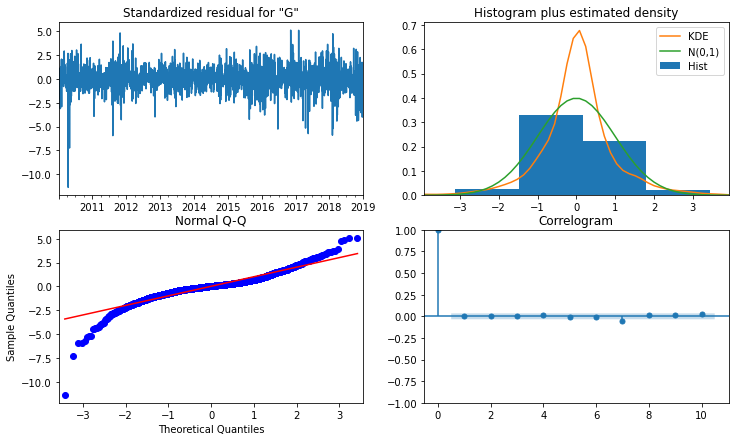

In [150]:
model_fit.plot_diagnostics(figsize=(12,7))
plt.show()

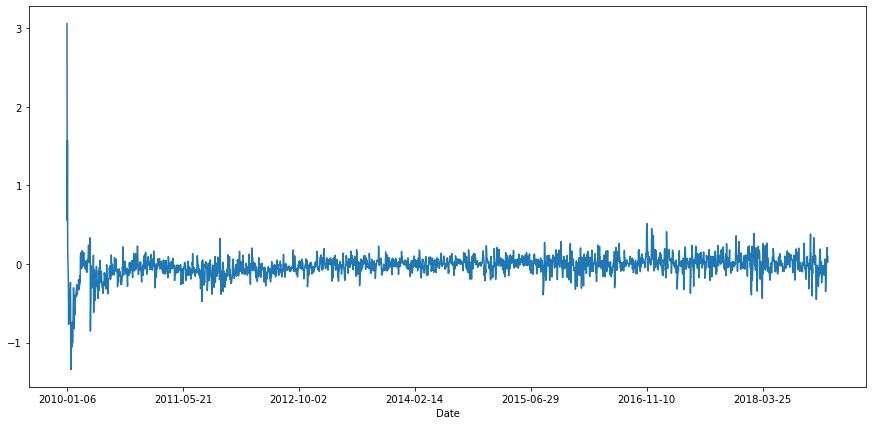

In [151]:
model_fit.fittedvalues[1:].plot(figsize = (15, 7));

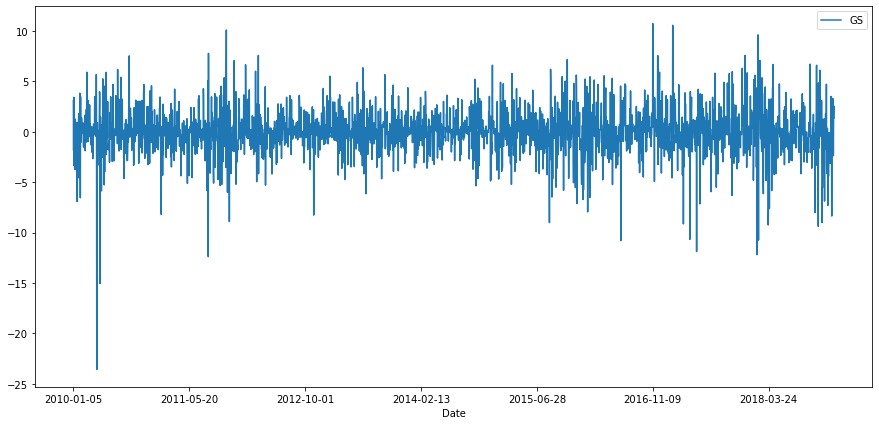

In [152]:
df_train.plot(figsize = (15, 7));

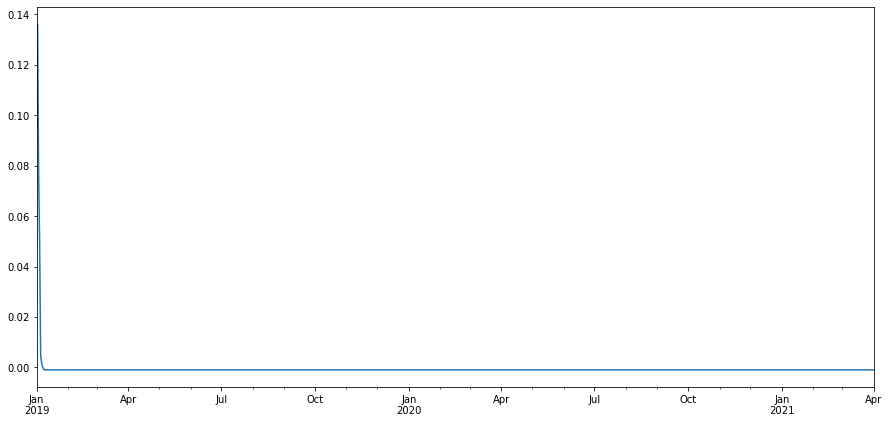

In [153]:
prediction = model_fit.predict(start =df_test.index[0], end = df_test.index[-1])
prediction.plot(figsize = (15, 7));

In [154]:
pred_df = df_.iloc[int(len(df_diff1)*0.8) : ]
pred_df['prediction'] = pred_df['GS'] + prediction.shift(-1).fillna(method = 'ffill').values
pred_df

,GS,prediction
Date,,
2019-01-01,169.540001,169.676133
2019-01-02,172.029999,172.106802
2019-01-03,169.509995,169.559595
2019-01-04,175.050003,175.054783
2019-01-05,175.373337,175.374950
...,...,...
2021-03-28,326.283346,326.282358
2021-03-29,325.730011,325.729024
2021-03-30,332.010010,332.009023


In [155]:
fig = px.line(pred_df, x=pred_df.index, y = pred_df.columns, title='Test/Prediction')
fig.show()

In [158]:
mean_squared_error(pred_df['GS'], pred_df['prediction'])

3.371193236359298e-05

##### 2 model

In [164]:
from statsmodels.tsa.arima_model import ARIMA

In [165]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
training_data = train_data['GS'].values
testing_data = test_data['GS'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(testing_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = testing_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(testing_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 13.038585025700572


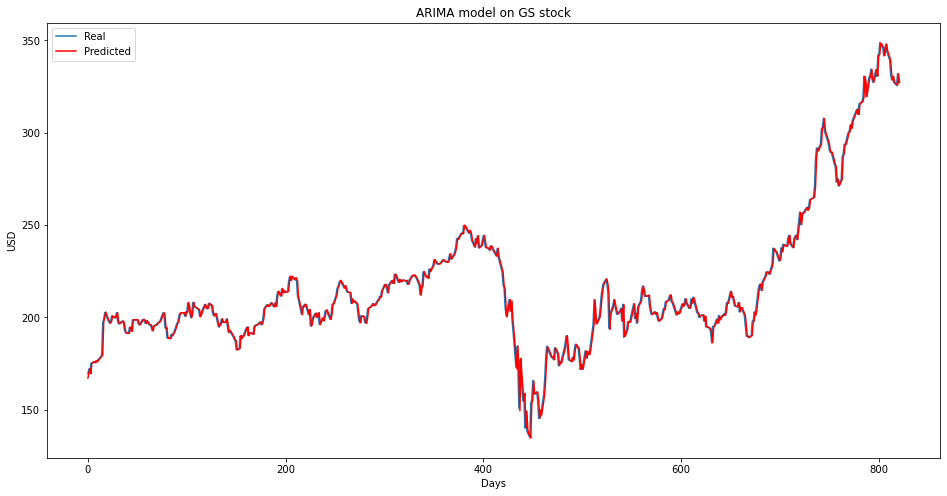

In [166]:
plt.figure(figsize=(16, 8))
plt.plot( testing_data, label='Real')
plt.plot( model_predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('ARIMA model on GS stock')
plt.legend()
plt.show()

In [167]:
arima_predicted_df = pd.DataFrame({'Date': test_data['Date'], 'Real': test_data['GS'], \
                                   'ARIMAPredicted': np.asarray(model_predictions).squeeze()})
arima_predicted_df

,Date,Real,ARIMAPredicted
3284,2019-01-01,169.540001,167.133283
3285,2019-01-02,172.029999,169.673309
3286,2019-01-03,169.509995,172.190408
3287,2019-01-04,175.050003,169.496154
3288,2019-01-05,175.373337,175.245636
...,...,...,...
4101,2021-03-28,326.283346,326.838792
4102,2021-03-29,325.730011,326.354624
4103,2021-03-30,332.010010,325.757741
4104,2021-03-31,327.000000,331.930531


In [168]:
model_fit = sm.tsa.arima.ARIMA(training_data, order=(1, 0, 1)).fit()


In [169]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3284
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7069.942
Date:                Fri, 28 May 2021   AIC                          14147.884
Time:                        02:42:00   BIC                          14172.271
Sample:                             0   HQIC                         14156.616
                               - 3284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.7915     31.297      5.521      0.000     111.450     234.133
ar.L1          0.9987      0.001   1292.471      0.000       0.997       1.000
ma.L1          0.0342      0.013      2.731      0.006       0.010       0.059
sigma2         4.3318      0.045     95.368      0.000       4.243       4.421
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13430.26
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

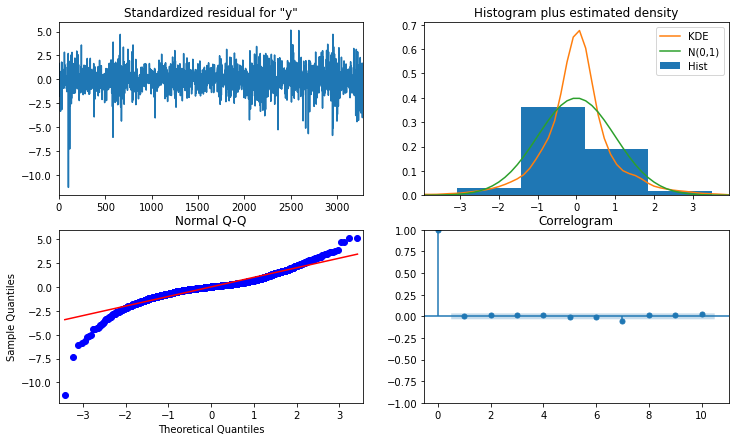

In [170]:
model_fit.plot_diagnostics(figsize=(12,7))
plt.show()

In [171]:
arima_fitted_df = pd.DataFrame({'Date': train_data['Date'], 'Real': train_data['GS'], \
                                   'ARIMAPredicted': model_fit.fittedvalues})
arima_fitted_df

,Date,Real,ARIMAPredicted
0,2010-01-04,173.080002,172.791530
1,2010-01-05,176.139999,173.079664
2,2010-01-06,174.259995,176.240477
3,2010-01-07,177.669998,174.190345
4,2010-01-08,174.309998,177.783043
...,...,...,...
3279,2018-12-27,165.410004,163.050534
3280,2018-12-28,163.029999,165.500027
3281,2018-12-29,164.370000,162.957632
3282,2018-12-30,165.710002,164.428894


In [172]:
arima_df = pd.concat([arima_fitted_df, arima_predicted_df])
arima_df.set_index('Date',inplace=True)
arima_df

,Real,ARIMAPredicted
Date,,
2010-01-04,173.080002,172.791530
2010-01-05,176.139999,173.079664
2010-01-06,174.259995,176.240477
2010-01-07,177.669998,174.190345
2010-01-08,174.309998,177.783043
...,...,...
2021-03-28,326.283346,326.838792
2021-03-29,325.730011,326.354624
2021-03-30,332.010010,325.757741


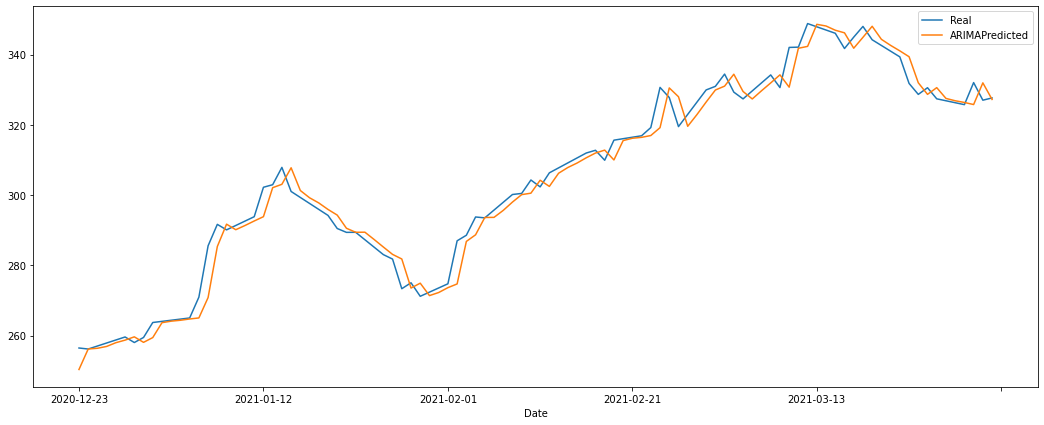

In [173]:
arima_df.iloc[-100:].plot(figsize=(18,7));

In [174]:
mean_squared_error(arima_df['Real'], arima_df['ARIMAPredicted'])

6.074820424414885

In [235]:
# arima_df.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\arima_data.csv')